In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("../ks-projects-201801/ks-projects-201801.csv")

In [3]:
df1 = pd.get_dummies(df['state'])
df2 = pd.merge(df, df1, left_index=True, right_index=True)

In [4]:
df2.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,canceled,failed,live,successful,suspended,undefined
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,0.102411,0.522153,0.007392,0.353762,0.004875,0.009407
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,0.303188,0.499510,0.085658,0.478137,0.069651,0.096532
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df2 = df2.drop("canceled", axis=1)
df2 = df2.drop("failed", axis=1)
df2 = df2.drop("live",  axis=1)
df2 = df2.drop("suspended",  axis=1)
df2 = df2.drop("undefined",  axis=1)
df2 = df2.drop("name", axis=1)
df2 = df2.drop("category", axis=1)
df2 = df2.drop("main_category", axis=1)
df2 = df2.drop("currency", axis=1)
df2 = df2.drop("deadline", axis=1)
df2 = df2.drop("launched", axis=1)
df2 = df2.drop("state", axis=1)
df2 = df2.drop("country", axis=1)

In [6]:
df2.head(3)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,successful
0,1000002330,1000.0,0.0,0,0.0,0.0,1533.95,0
1,1000003930,30000.0,2421.0,15,100.0,2421.0,30000.00,0
2,1000004038,45000.0,220.0,3,220.0,220.0,45000.00,0


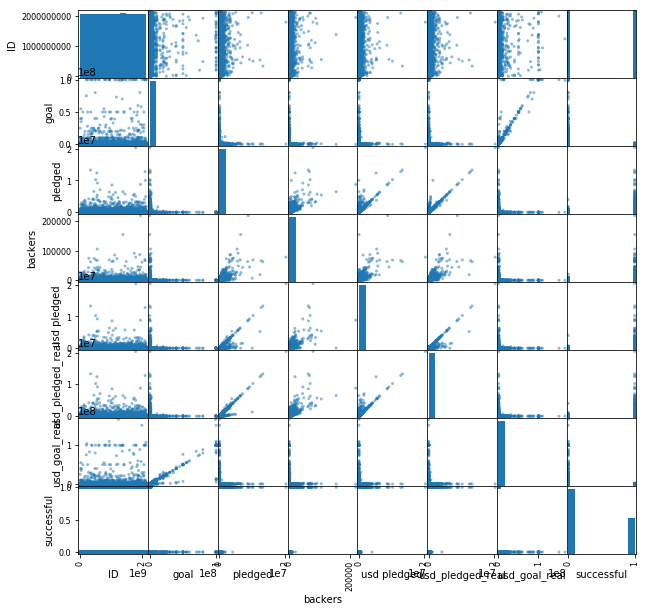

In [7]:
pd.plotting.scatter_matrix(df2, figsize=(10,10))
plt.show()

In [9]:
# ロジスティック回帰
y = df2["successful"].values
X = df2[["goal", "pledged"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
# ラベルを予測
y_pred = clf.predict(X)

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 99.113%
適合率（Precision） = 100.000%
再現率（Recall） = 98.628%
F1値（F1-score） = 99.309%


MAE = 0.457
MAE = 0.457


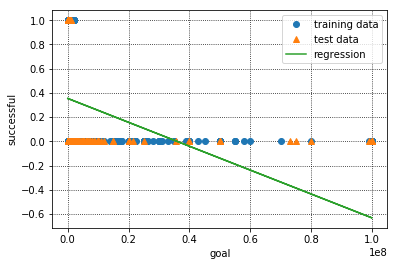

In [11]:
x = df2[["goal"]].values
X = x.reshape(-1,1) # scikit-learnに入力するために整形
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

# 学習用データを使って線形回帰モデルを学習
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train)

# 学習データに対するMAEを計算（訓練誤差の評価）
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE = %s"%round(mae,3) )

# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test)

# テストデータに対するMAEを計算（汎化誤差の評価）
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE = %s"%round(mae,3) )

# グラフに重ねて表示する
plt.plot(X_train, y_train, 'o', label='training data')
plt.plot(X_test, y_test, '^', label='test data')
plt.ylabel("successful")
plt.xlabel("goal")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X_train, y_pred_train, label='regression')
plt.legend(loc='best')
plt.show()


In [ ]:
%%time
C = 5
clf = SVR(C=C, kernel="linear")
clf.fit(X_train, y_train)
print(clf.best_params_, clf.best_score_)